
# Music Synchronization with Dynamic Time Warping

In this short tutorial, we demonstrate the use of dynamic time warping (DTW) for music synchronization
which is implemented in `librosa`.

We assume that you are familiar with the algorithm and focus on the application. Further information about
the algorithm can be found in the literature, e. g. [1]_.

Our example consists of two recordings of the first bars of the famous
brass section lick in Stevie Wonder's rendition of "Sir Duke".
Due to differences in tempo, the first recording lasts for ca. 7 seconds and the second recording for ca. 5 seconds.
Our objective is now to find an alignment between these two recordings by using DTW.


In [2]:
!pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp312-abi3-win_amd64.whl.metadata (5.6 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl (1.0 MB)
Using cached soxr-0.5.0.post1-cp312-abi3-win_amd64.whl (164 kB)


In [3]:
# Code source: Stefan Balke
# License: ISC
# sphinx_gallery_thumbnail_number = 4

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import librosa

## Load Audio Recordings
First, let's load a first version of our audio recordings.



c:\Users\sarag\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\sarag\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\sarag\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


[Text(0.5, 1.0, 'Faster Version $live$')]

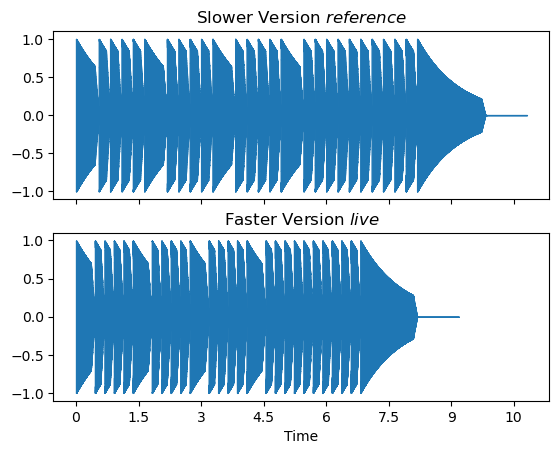

In [4]:
reference, fs = librosa.load('mutts/audios/Acordai-100_reference.wav')
live, fs = librosa.load('mutts/audios/Acordai-100_faster_tempo.wav')
# And a second version, slightly faster.

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(reference, sr=fs, ax=ax[0])
ax[0].set(title='Reference Version $reference$')
ax[0].label_outer()

librosa.display.waveshow(live, sr=fs, ax=ax[1])
ax[1].set(title='Live Version $live$')

## Extract Chroma Features



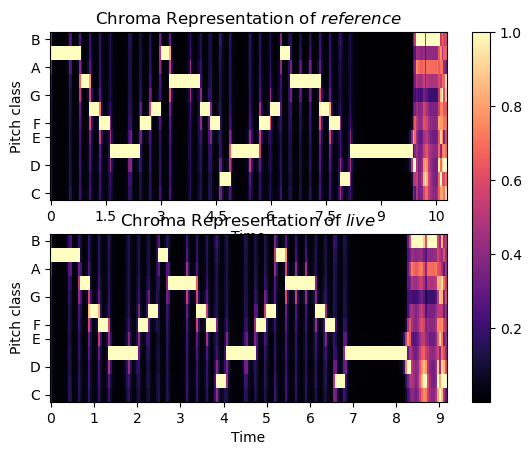

In [5]:
hop_length = 1024

reference_chroma = librosa.feature.chroma_cqt(y=reference, sr=fs,
                                         hop_length=hop_length)
live_chroma = librosa.feature.chroma_cqt(y=live, sr=fs,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=2, sharey=True)
img = librosa.display.specshow(reference_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax[0])
ax[0].set(title='Chroma Representation of $reference$')
librosa.display.specshow(live_chroma, x_axis='time',
                         y_axis='chroma',
                         hop_length=hop_length, ax=ax[1])
ax[1].set(title='Chroma Representation of $live$')
fig.colorbar(img, ax=ax)

## Align Chroma Sequences



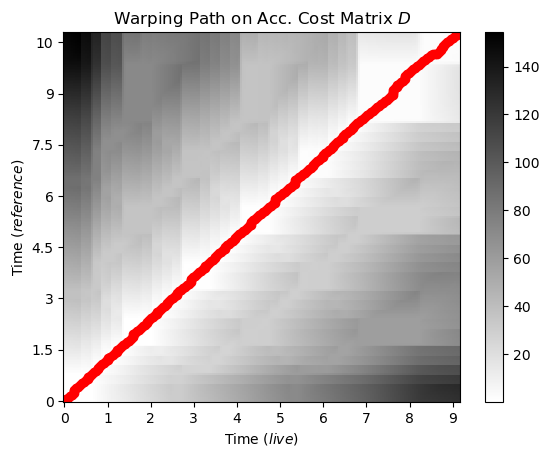

In [6]:
D, wp = librosa.sequence.dtw(X=reference_chroma, Y=live_chroma, metric='cosine')
wp_s = librosa.frames_to_time(wp, sr=fs, hop_length=hop_length)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=fs,
                               cmap='gray_r', hop_length=hop_length, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time $(live)$', ylabel='Time $(reference)$')
fig.colorbar(img, ax=ax)

## Alternative Visualization in the Time Domain

We can also visualize the warping path directly on our time domain signals.
Red lines connect corresponding time positions in the input signals.
(Thanks to F. Zalkow for the nice visualization.)



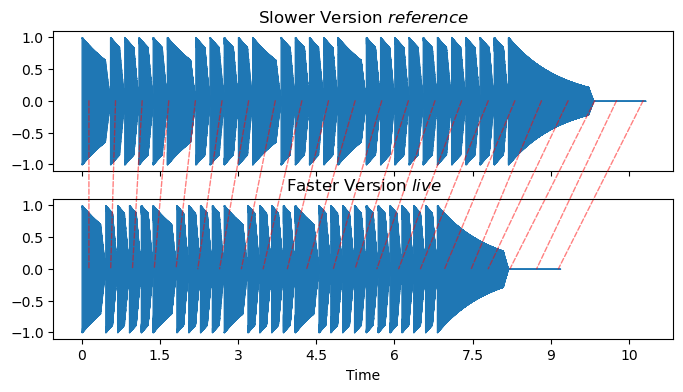

In [7]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,4))

# Plot live
librosa.display.waveshow(live, sr=fs, ax=ax2)
ax2.set(title='Faster Version $live$')

# Plot reference
librosa.display.waveshow(reference, sr=fs, ax=ax1)
ax1.set(title='Slower Version $reference$')
ax1.label_outer()


n_arrows = 20
for tp1, tp2 in wp_s[::len(wp_s)//n_arrows]:
    # Create a connection patch between the aligned time points
    # in each subplot
    con = ConnectionPatch(xyA=(tp1, 0), xyB=(tp2, 0),
                          axesA=ax1, axesB=ax2,
                          coordsA='data', coordsB='data',
                          color='r', linestyle='--',
                          alpha=0.5)
    con.set_in_layout(False)  # This is needed to preserve layout
    ax2.add_artist(con)

## Next steps...

Alright, you might ask where to go from here.
Once we have the warping path between our two signals,
we could realize different applications.
One example is a player which enables you to navigate between
different recordings of the same piece of music,
e.g. one of Wagner's symphonies played by an orchestra or in a piano-reduced version.

Another example is that you could apply time scale modification algorithms,
e.g. speed up the slower signal to the tempo of the faster one.

## Literature

.. [1] Meinard Müller, Fundamentals of Music Processing — Audio, Analysis, Algorithms, Applications.
    Springer Verlag, 2015.



In [12]:
!pip install pyrubberband
!sudo apt install rubberband-cli

Sudo está deshabilitado en este equipo. Para habilitarlo, vaya a ]8;;ms-settings:developers\Página Configuración del desarrollador]8;;\ en la aplicación Configuración


RuntimeError: Failed to execute rubberband. Please verify that rubberband-cli is installed.

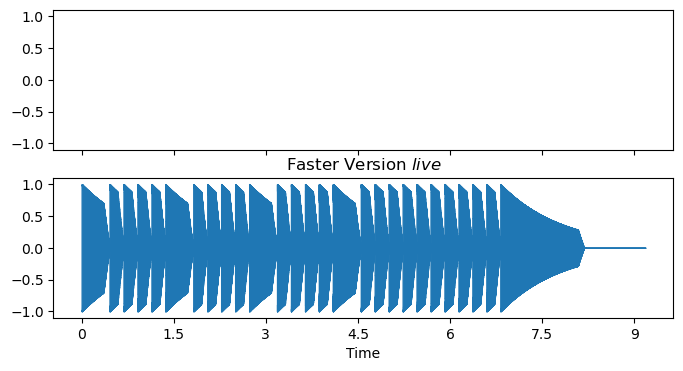

In [11]:
import pyrubberband

def sinc(x, wp_s, sample_rate, out_len, n_arrows = 10):
  time_map = [(int(x*sample_rate), int(y*sample_rate)) for (x, y) in wp_s[::len(wp_s)//n_arrows]]
  time_map.append((len(x), out_len))
  return pyrubberband.pyrb.timemap_stretch(x, fs, time_map)


# Plot live
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,4))

# Plot live
librosa.display.waveshow(live, sr=fs, ax=ax2)
ax2.set(title='Faster Version $live$')

# Plot reference
librosa.display.waveshow(sinc(reference, wp_s[::-1], fs, len(live)), sr=fs, ax=ax1)
ax1.set(title='Slower Version $reference$')
ax1.label_outer()